# 📊 STEP4 — Comparaison Interactive des Modèles

Ce notebook compare tous les modèles de STEP3 (Classification, Clustering, Régression) à l'aide d'une interface interactive utilisant **ipywidgets**.

---

## 📋 Table des Matières

1. [Installation et Imports](#1.-Installation-et-Imports)
2. [Chargement et Préparation des Données](#2.-Chargement-et-Préparation-des-Données)
   - 2.1 [Aperçu du Dataset](#2.1-Aperçu-du-Dataset)
   - 2.2 [Spécification des Entrées/Sorties par Type de Modèle](#2.2-Spécification-des-Entrées/Sorties-par-Type-de-Modèle)
3. [Modèles de Classification](#3.-Interface-Interactive-—-Comparaison-des-Modèles-de-Classification)
4. [Modèles de Clustering](#4.-Interface-Interactive-—-Comparaison-des-Modèles-de-Clustering)
5. [Modèles de Régression](#5.-Interface-Interactive-—-Comparaison-des-Modèles-de-Régression)
6. [Dashboard Récapitulatif Global](#6.-Dashboard-Récapitulatif-Global)
7. [🏆 Comparaison Finale des 3 Types de Modèles](#7.-🏆-Comparaison-Finale-des-3-Types-de-Modèles)

---
## 1. Installation et Imports

In [15]:
# Installation des dépendances
%pip install ipywidgets scikit-learn pandas numpy matplotlib seaborn --quiet
%pip install jinja2 --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Clustering models
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

print("✅ Imports réussis!")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
✅ Imports réussis!



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


---
## 2. Chargement et Préparation des Données

In [16]:
# Charger les données nettoyées
df = pd.read_csv('../STEP1_PRETREATMENT/DISASTERS_CLEANED.csv')
print(f"📊 Données chargées: {df.shape[0]} lignes, {df.shape[1]} colonnes")
df.head()

📊 Données chargées: 15818 lignes, 23 colonnes


,Year,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Region,Continent,Latitude,Longitude,...,No Affected,No Homeless,Total Affected,Total Damages ('000 US$),Insured Damages ('000 US$),Start_Date,End_Date,Duration_Days,Month,Season
0,1902,0,0,0,0,0,0,0,14.000,-91.00,...,0.0,0.0,0.0,25000.0,0.0,1902-04-18,1902-04-18,0.0,4.0,0
1,1902,0,0,1,1,0,0,0,14.400,-90.22,...,0.0,0.0,0.0,0.0,0.0,1902-04-08,1902-04-08,0.0,4.0,0
2,1902,0,0,1,1,0,0,0,14.400,-90.22,...,0.0,0.0,0.0,0.0,0.0,1902-10-24,1902-10-24,0.0,10.0,1
3,1903,0,0,2,2,1,1,0,50.358,-81.96,...,0.0,0.0,23.0,0.0,0.0,1903-04-29,1903-04-29,0.0,4.0,0
4,1904,0,1,3,3,2,2,1,22.587,91.13,...,0.0,0.0,0.0,0.0,0.0,1904-11-01,1904-11-01,0.0,11.0,1


### 2.1 Aperçu du Dataset

Le fichier `DISASTERS_CLEANED.csv` contient **23 colonnes** représentant différentes caractéristiques des catastrophes naturelles:

In [17]:
# Afficher toutes les colonnes avec leurs types
print("="*60)
print("📋 LISTE DES 23 COLONNES DU DATASET")
print("="*60)

column_info = pd.DataFrame({
    'Colonne': df.columns,
    'Type': df.dtypes.values,
    'Non-Null Count': df.notna().sum().values,
    'Exemple': [df[col].iloc[0] for col in df.columns]
})
display(column_info)

print(f"\n📊 Total: {len(df.columns)} colonnes, {len(df)} lignes")

📋 LISTE DES 23 COLONNES DU DATASET


,Colonne,Type,Non-Null Count,Exemple
0,Year,int64,15818,1902
1,Disaster Group,int64,15818,0
2,Disaster Subgroup,int64,15818,0
3,Disaster Type,int64,15818,0
4,Disaster Subtype,int64,15818,0
5,Country,int64,15818,0
6,Region,int64,15818,0
7,Continent,int64,15818,0
8,Latitude,float64,15818,14.0
9,Longitude,float64,15818,-91.0



📊 Total: 23 colonnes, 15818 lignes


### 2.2 Spécification des Entrées/Sorties par Type de Modèle

| Type de Modèle | Entrées (Features) | Sortie (Target) | Nombre de Features |
|----------------|-------------------|-----------------|--------------------|
| **Classification** | Country, Region, Continent, Season, Month, Duration_Days, Latitude, Longitude | `Disaster Type` | 8 |
| **Clustering** | Latitude, Longitude, Duration_Days, Total Deaths, Total Affected | Cluster Labels (non supervisé) | 5 |
| **Régression** | Year, Disaster Type, Country, Region, Continent, Duration_Days, Latitude, Longitude | `Total Deaths` | 8 |

---
## 2.3 Préparation des Données pour Chaque Type de Modèle

### 📌 Classification
- **Objectif**: Prédire le type de catastrophe (`Disaster Type`)
- **Features (8)**: `Country`, `Region`, `Continent`, `Season`, `Month`, `Duration_Days`, `Latitude`, `Longitude`
- **Target**: `Disaster Type`

In [18]:
# ==========================================
# Préparation des données pour Classification
# ==========================================
features_clf = ['Country', 'Region', 'Continent', 'Season', 'Month', 'Duration_Days', 'Latitude', 'Longitude']
target_clf = 'Disaster Type'

print("📌 CLASSIFICATION")
print(f"   Entrées: {features_clf}")
print(f"   Sortie: {target_clf}")

X_clf = df[features_clf].fillna(0)
y_clf = df[target_clf]

# Split des données
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Scaling
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print(f"✅ Classification: {len(X_train_clf)} échantillons d'entraînement, {len(X_test_clf)} échantillons de test")

📌 CLASSIFICATION
   Entrées: ['Country', 'Region', 'Continent', 'Season', 'Month', 'Duration_Days', 'Latitude', 'Longitude']
   Sortie: Disaster Type
✅ Classification: 12654 échantillons d'entraînement, 3164 échantillons de test


### 📌 Clustering
- **Objectif**: Grouper les catastrophes en clusters similaires (apprentissage non supervisé)
- **Features (5)**: `Latitude`, `Longitude`, `Duration_Days`, `Total Deaths`, `Total Affected`
- **Target**: Aucun (algorithme non supervisé)

In [19]:
# ==========================================
# Préparation des données pour Clustering
# ==========================================
features_clust = ['Latitude', 'Longitude', 'Duration_Days', 'Total Deaths', 'Total Affected']

print("📌 CLUSTERING")
print(f"   Entrées: {features_clust}")
print(f"   Sortie: Cluster Labels (non supervisé)")

# Nettoyage pour les outliers géographiques
mask_clean = (
    (df['Latitude'].between(-90, 90)) &
    (df['Longitude'].between(-180, 180)) &
    (df['Duration_Days'] < 3650)
)
df_clean = df[mask_clean].dropna(subset=features_clust).copy()

X_clust = df_clean[features_clust]
scaler_clust = StandardScaler()
X_clust_scaled = scaler_clust.fit_transform(X_clust)

# Limiter pour performance
if len(X_clust_scaled) > 5000:
    sample_idx = np.random.choice(len(X_clust_scaled), 5000, replace=False)
    X_clust_scaled = X_clust_scaled[sample_idx]

print(f"✅ Clustering: {len(X_clust_scaled)} échantillons")

📌 CLUSTERING
   Entrées: ['Latitude', 'Longitude', 'Duration_Days', 'Total Deaths', 'Total Affected']
   Sortie: Cluster Labels (non supervisé)
✅ Clustering: 5000 échantillons


### 📌 Régression
- **Objectif**: Prédire le nombre total de décès (`Total Deaths`)
- **Features (8)**: `Year`, `Disaster Type`, `Country`, `Region`, `Continent`, `Duration_Days`, `Latitude`, `Longitude`
- **Target**: `Total Deaths`

In [20]:
# ==========================================
# Préparation des données pour Régression
# ==========================================
features_reg = ['Year', 'Disaster Type', 'Country', 'Region', 'Continent', 'Duration_Days', 'Latitude', 'Longitude']
target_reg = 'Total Deaths'

print("📌 RÉGRESSION")
print(f"   Entrées: {features_reg}")
print(f"   Sortie: {target_reg}")

# Filtrer les valeurs aberrantes pour la régression
df_reg = df[df['Total Deaths'] > 0].copy()
df_reg = df_reg[df_reg['Total Deaths'] < df_reg['Total Deaths'].quantile(0.95)]  # Retirer les 5% supérieurs

X_reg = df_reg[features_reg].fillna(0)
y_reg = df_reg[target_reg]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"✅ Régression: {len(X_train_reg)} échantillons d'entraînement, {len(X_test_reg)} échantillons de test")

📌 RÉGRESSION
   Entrées: ['Year', 'Disaster Type', 'Country', 'Region', 'Continent', 'Duration_Days', 'Latitude', 'Longitude']
   Sortie: Total Deaths
✅ Régression: 8615 échantillons d'entraînement, 2154 échantillons de test


---
## 3. Interface Interactive — Comparaison des Modèles de Classification

| Entrées | Sortie |
|---------|--------|
| Country, Region, Continent, Season, Month, Duration_Days, Latitude, Longitude | **Disaster Type** |

In [21]:
# Dictionnaire des modèles de classification
clf_models = {
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Entraîner tous les modèles et stocker les résultats
clf_results = {}
print("⏳ Entraînement des modèles de classification...")

for name, model in clf_models.items():
    print(f"   Training {name}...")
    model.fit(X_train_clf_scaled, y_train_clf)
    y_pred = model.predict(X_test_clf_scaled)
    
    clf_results[name] = {
        'model': model,
        'y_pred': y_pred,
        'accuracy': accuracy_score(y_test_clf, y_pred),
        'precision': precision_score(y_test_clf, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_test_clf, y_pred, average='weighted', zero_division=0),
        'f1': f1_score(y_test_clf, y_pred, average='weighted', zero_division=0)
    }

print("✅ Tous les modèles sont entraînés!")

⏳ Entraînement des modèles de classification...
   Training KNN (k=5)...
   Training SVM (RBF)...
   Training Decision Tree...
   Training Random Forest...
   Training Neural Network...
✅ Tous les modèles sont entraînés!


In [ ]:
# ==========================================
# Interface Interactive — Classification
# ==========================================

# Widgets
clf_model_selector = widgets.SelectMultiple(
    options=list(clf_results.keys()),
    value=list(clf_results.keys())[:3],
    description='Modèles:',
    disabled=False,
    layout=widgets.Layout(width='300px', height='120px')
)

clf_metric_selector = widgets.Dropdown(
    options=['accuracy', 'precision', 'recall', 'f1'],
    value='accuracy',
    description='Métrique:',
    disabled=False
)

clf_output = widgets.Output()

def update_clf_comparison(change):
    with clf_output:
        clear_output(wait=True)
        
        selected_models = clf_model_selector.value
        selected_metric = clf_metric_selector.value
        
        if not selected_models:
            print("Veuillez sélectionner au moins un modèle.")
            return
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Graphique 1: Comparaison des métriques
        models_names = list(selected_models)
        metric_values = [clf_results[m][selected_metric] for m in selected_models]
        
        colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(models_names)))
        bars = axes[0].bar(models_names, metric_values, color=colors)
        axes[0].set_xlabel('Modèle')
        axes[0].set_ylabel(selected_metric.capitalize())
        axes[0].set_title(f'Comparaison: {selected_metric.capitalize()}')
        axes[0].set_ylim(0, 1)
        axes[0].tick_params(axis='x', rotation=45)
        
        # Ajouter les valeurs sur les barres
        for bar, val in zip(bars, metric_values):
            axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                        f'{val:.3f}', ha='center', va='bottom', fontsize=10)
        
        # Graphique 2: Tableau récapitulatif
        metrics = ['accuracy', 'precision', 'recall', 'f1']
        table_data = []
        for m in selected_models:
            row = [f"{clf_results[m][metric]:.4f}" for metric in metrics]
            table_data.append(row)
        
        axes[1].axis('off')
        table = axes[1].table(
            cellText=table_data,
            rowLabels=models_names,
            colLabels=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
            cellLoc='center',
            loc='center'
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        axes[1].set_title('Tableau des Métriques')
        
        plt.tight_layout()
        plt.show()
        
        # Meilleur modèle
        best_model = max(selected_models, key=lambda m: clf_results[m][selected_metric])
        print(f"\n🏆 Meilleur modèle pour {selected_metric}: {best_model} ({clf_results[best_model][selected_metric]:.4f})")

clf_model_selector.observe(update_clf_comparison, names='value')
clf_metric_selector.observe(update_clf_comparison, names='value')

print("🎛️ Interface de Comparaison — Classification")
print("="*50)
display(widgets.HBox([clf_model_selector, clf_metric_selector]))
display(clf_output)
update_clf_comparison(None)

🎛️ Interface de Comparaison — Classification


Output()

### 3.1 Matrice de Confusion Interactive

In [23]:
# Widget pour la matrice de confusion
cm_model_selector = widgets.Dropdown(
    options=list(clf_results.keys()),
    value=list(clf_results.keys())[0],
    description='Modèle:',
    disabled=False
)

cm_output = widgets.Output()

def show_confusion_matrix(change):
    with cm_output:
        clear_output(wait=True)
        
        model_name = cm_model_selector.value
        y_pred = clf_results[model_name]['y_pred']
        
        unique_classes = np.unique(y_test_clf)
        cm = confusion_matrix(y_test_clf, y_pred, labels=unique_classes)
        
        if len(unique_classes) <= 15:
            plt.figure(figsize=(10, 8))
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
            disp.plot(cmap='Blues', values_format='d')
            plt.title(f'Matrice de Confusion — {model_name}')
            plt.show()
        else:
            print(f"Trop de classes ({len(unique_classes)}) pour afficher la matrice de confusion.")
            print(f"\nAccuracy: {clf_results[model_name]['accuracy']:.4f}")

cm_model_selector.observe(show_confusion_matrix, names='value')

print("🔲 Matrice de Confusion Interactive")
print("="*50)
display(cm_model_selector)
display(cm_output)
show_confusion_matrix(None)

🔲 Matrice de Confusion Interactive


Dropdown(description='Modèle:', options=('KNN (k=5)', 'SVM (RBF)', 'Decision Tree', 'Random Forest', 'Neural N…

Output()

---
## 4. Interface Interactive — Comparaison des Modèles de Clustering

| Entrées | Sortie |
|---------|--------|
| Latitude, Longitude, Duration_Days, Total Deaths, Total Affected | **Cluster Labels** (non supervisé) |

In [24]:
# Widgets pour Clustering
n_clusters_slider = widgets.IntSlider(
    value=4,
    min=2,
    max=10,
    step=1,
    description='N Clusters:',
    disabled=False
)

clust_method_selector = widgets.RadioButtons(
    options=['KMeans', 'SpectralClustering', 'DBSCAN'],
    value='KMeans',
    description='Méthode:',
    disabled=False
)

clust_output = widgets.Output()

# Store clustering results for final comparison
clust_results = {}

def run_clustering(change):
    global clust_results
    with clust_output:
        clear_output(wait=True)
        
        method = clust_method_selector.value
        n_clusters = n_clusters_slider.value
        
        print(f"⏳ Exécution de {method}...")
        
        if method == 'KMeans':
            model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            labels = model.fit_predict(X_clust_scaled)
            inertia = model.inertia_
        elif method == 'SpectralClustering':
            # Limiter pour SpectralClustering (coûteux)
            sample_size = min(2000, len(X_clust_scaled))
            sample_idx = np.random.choice(len(X_clust_scaled), sample_size, replace=False)
            X_sample = X_clust_scaled[sample_idx]
            model = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors', n_neighbors=10)
            labels = model.fit_predict(X_sample)
            inertia = None
        else:  # DBSCAN
            model = DBSCAN(eps=0.5, min_samples=5)
            labels = model.fit_predict(X_clust_scaled)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            inertia = None
        
        # Calculer le Silhouette Score (si plus d'un cluster)
        if method == 'SpectralClustering':
            X_for_score = X_sample
        else:
            X_for_score = X_clust_scaled
            
        n_unique = len(set(labels)) - (1 if -1 in labels else 0)
        if n_unique > 1:
            silhouette = silhouette_score(X_for_score, labels)
        else:
            silhouette = None
        
        # Store results
        clust_results[method] = {
            'n_clusters': n_unique,
            'silhouette': silhouette,
            'inertia': inertia
        }
        
        # Visualisation
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Plot 1: Clusters (2D projection)
        if method == 'SpectralClustering':
            scatter = axes[0].scatter(X_sample[:, 0], X_sample[:, 1], c=labels, cmap='viridis', alpha=0.6, s=20)
        else:
            scatter = axes[0].scatter(X_clust_scaled[:, 0], X_clust_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, s=20)
        
        axes[0].set_xlabel('Feature 1 (Latitude scaled)')
        axes[0].set_ylabel('Feature 2 (Longitude scaled)')
        axes[0].set_title(f'{method} — Visualisation 2D')
        plt.colorbar(scatter, ax=axes[0], label='Cluster')
        
        # Plot 2: Métriques
        metrics_text = f"""
        Méthode: {method}
        Nombre de clusters: {n_unique}
        Silhouette Score: {f"{silhouette:.4f}" if silhouette else 'N/A'}
        Inertie: {f"{inertia:.2f}" if inertia else 'N/A'}
        """
        axes[1].text(0.5, 0.5, metrics_text, ha='center', va='center', fontsize=14, 
                     transform=axes[1].transAxes, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        axes[1].axis('off')
        axes[1].set_title('Métriques de Clustering')
        
        plt.tight_layout()
        plt.show()

n_clusters_slider.observe(run_clustering, names='value')
clust_method_selector.observe(run_clustering, names='value')

print("🎛️ Interface de Comparaison — Clustering")
print("="*50)
display(widgets.HBox([clust_method_selector, n_clusters_slider]))
display(clust_output)
run_clustering(None)

🎛️ Interface de Comparaison — Clustering


Output()

---
## 5. Interface Interactive — Comparaison des Modèles de Régression

| Entrées | Sortie |
|---------|--------|
| Year, Disaster Type, Country, Region, Continent, Duration_Days, Latitude, Longitude | **Total Deaths** |

In [25]:
# Dictionnaire des modèles de régression
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Entraîner tous les modèles
reg_results = {}
print("⏳ Entraînement des modèles de régression...")

for name, model in reg_models.items():
    print(f"   Training {name}...")
    model.fit(X_train_reg_scaled, y_train_reg)
    y_pred = model.predict(X_test_reg_scaled)
    
    reg_results[name] = {
        'model': model,
        'y_pred': y_pred,
        'r2': r2_score(y_test_reg, y_pred),
        'mse': mean_squared_error(y_test_reg, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test_reg, y_pred)),
        'mae': mean_absolute_error(y_test_reg, y_pred)
    }

print("✅ Tous les modèles de régression sont entraînés!")

⏳ Entraînement des modèles de régression...
   Training Linear Regression...
   Training Ridge Regression...
   Training Lasso Regression...
   Training Random Forest...
   Training Gradient Boosting...
✅ Tous les modèles de régression sont entraînés!


In [ ]:
# Interface pour la régression
reg_model_selector = widgets.SelectMultiple(
    options=list(reg_results.keys()),
    value=list(reg_results.keys())[:3],
    description='Modèles:',
    disabled=False,
    layout=widgets.Layout(width='300px', height='120px')
)

reg_metric_selector = widgets.Dropdown(
    options=[('R² Score', 'r2'), ('MSE', 'mse'), ('RMSE', 'rmse'), ('MAE', 'mae')],
    value='r2',
    description='Métrique:',
    disabled=False
)

reg_output = widgets.Output()

def update_reg_comparison(change):
    with reg_output:
        clear_output(wait=True)
        
        selected_models = reg_model_selector.value
        selected_metric = reg_metric_selector.value
        
        if not selected_models:
            print("Veuillez sélectionner au moins un modèle.")
            return
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Graphique: Comparaison des métriques
        models_names = list(selected_models)
        metric_values = [reg_results[m][selected_metric] for m in selected_models]
        
        colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(models_names)))
        bars = axes[0].bar(models_names, metric_values, color=colors)
        axes[0].set_xlabel('Modèle')
        axes[0].set_ylabel(selected_metric.upper())
        axes[0].set_title(f'Comparaison: {selected_metric.upper()}')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Ajouter les valeurs sur les barres
        for bar, val in zip(bars, metric_values):
            axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                        f'{val:.3f}', ha='center', va='bottom', fontsize=10)
        
        # Tableau récapitulatif
        metrics = ['r2', 'mse', 'rmse', 'mae']
        table_data = []
        for m in selected_models:
            row = [f"{reg_results[m]['r2']:.4f}", 
                   f"{reg_results[m]['mse']:.2f}",
                   f"{reg_results[m]['rmse']:.2f}",
                   f"{reg_results[m]['mae']:.2f}"]
            table_data.append(row)
        
        axes[1].axis('off')
        table = axes[1].table(
            cellText=table_data,
            rowLabels=models_names,
            colLabels=['R²', 'MSE', 'RMSE', 'MAE'],
            cellLoc='center',
            loc='center'
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        axes[1].set_title('Tableau des Métriques')
        
        plt.tight_layout()
        plt.show()
        
        # Meilleur modèle (pour R², plus haut est meilleur; pour erreurs, plus bas est meilleur)
        if selected_metric == 'r2':
            best_model = max(selected_models, key=lambda m: reg_results[m][selected_metric])
        else:
            best_model = min(selected_models, key=lambda m: reg_results[m][selected_metric])
        print(f"\n🏆 Meilleur modèle pour {selected_metric.upper()}: {best_model} ({reg_results[best_model][selected_metric]:.4f})")

reg_model_selector.observe(update_reg_comparison, names='value')
reg_metric_selector.observe(update_reg_comparison, names='value')

print("🎛️ Interface de Comparaison — Régression")
print("="*50)
display(widgets.HBox([reg_model_selector, reg_metric_selector]))
display(reg_output)
update_reg_comparison(None)

🎛️ Interface de Comparaison — Régression


Output()

---
## 6. Dashboard Récapitulatif Global

In [27]:
# Dashboard final
print("="*60)
print("🏆 RÉSUMÉ DES MEILLEURS MODÈLES")
print("="*60)

# Meilleur modèle de classification (par accuracy)
best_clf = max(clf_results.keys(), key=lambda m: clf_results[m]['accuracy'])
print(f"\n📊 CLASSIFICATION (Accuracy):")
print(f"   Meilleur: {best_clf} — Accuracy: {clf_results[best_clf]['accuracy']:.4f}")

# Meilleur modèle de régression (par R²)
best_reg = max(reg_results.keys(), key=lambda m: reg_results[m]['r2'])
print(f"\n📈 RÉGRESSION (R² Score):")
print(f"   Meilleur: {best_reg} — R²: {reg_results[best_reg]['r2']:.4f}")

print("\n" + "="*60)
print("📋 TABLEAU COMPARATIF — CLASSIFICATION")
print("="*60)
clf_df = pd.DataFrame([
    {'Modèle': k, 'Accuracy': v['accuracy'], 'Precision': v['precision'], 
     'Recall': v['recall'], 'F1-Score': v['f1']}
    for k, v in clf_results.items()
]).sort_values('Accuracy', ascending=False)
display(clf_df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'], color='lightgreen'))

print("\n" + "="*60)
print("📋 TABLEAU COMPARATIF — RÉGRESSION")
print("="*60)
reg_df = pd.DataFrame([
    {'Modèle': k, 'R²': v['r2'], 'MSE': v['mse'], 'RMSE': v['rmse'], 'MAE': v['mae']}
    for k, v in reg_results.items()
]).sort_values('R²', ascending=False)
display(reg_df.style.highlight_max(subset=['R²'], color='lightgreen').highlight_min(subset=['MSE', 'RMSE', 'MAE'], color='lightgreen'))

🏆 RÉSUMÉ DES MEILLEURS MODÈLES

📊 CLASSIFICATION (Accuracy):
   Meilleur: Random Forest — Accuracy: 0.6103

📈 RÉGRESSION (R² Score):
   Meilleur: Gradient Boosting — R²: 0.1585

📋 TABLEAU COMPARATIF — CLASSIFICATION


,Modèle,Accuracy,Precision,Recall,F1-Score
3,Random Forest,0.610303,0.602313,0.610303,0.603122
2,Decision Tree,0.584703,0.581093,0.584703,0.579139
4,Neural Network,0.564159,0.534415,0.564159,0.525595
0,KNN (k=5),0.541403,0.523493,0.541403,0.524946
1,SVM (RBF),0.469343,0.366550,0.469343,0.393919



📋 TABLEAU COMPARATIF — RÉGRESSION


,Modèle,R²,MSE,RMSE,MAE
4,Gradient Boosting,0.158462,6977.982491,83.534319,46.787297
3,Random Forest,0.112869,7356.034554,85.767328,47.816139
1,Ridge Regression,0.076358,7658.780722,87.514460,51.744987
0,Linear Regression,0.076356,7658.796482,87.514550,51.744969
2,Lasso Regression,0.075228,7668.156234,87.568009,51.843445


---
## 7. 🏆 Comparaison Finale des 3 Types de Modèles

Cette section présente une vue d'ensemble comparative des trois types de modèles utilisés, avec leurs entrées, sorties, et performances.

In [28]:
print("="*80)
print("🏆 COMPARAISON FINALE DES 3 TYPES DE MODÈLES")
print("="*80)

# Get best scores
best_clf_name = max(clf_results.keys(), key=lambda m: clf_results[m]['accuracy'])
best_clf_score = clf_results[best_clf_name]['accuracy']

best_reg_name = max(reg_results.keys(), key=lambda m: reg_results[m]['r2'])
best_reg_score = reg_results[best_reg_name]['r2']

# Get best clustering score (if available)
if clust_results:
    best_clust = max(clust_results.items(), key=lambda x: x[1]['silhouette'] if x[1]['silhouette'] else 0)
    best_clust_name = best_clust[0]
    best_clust_score = best_clust[1]['silhouette']
else:
    best_clust_name = 'KMeans'
    best_clust_score = None

🏆 COMPARAISON FINALE DES 3 TYPES DE MODÈLES


### 📋 Tableau Récapitulatif des Entrées/Sorties par Type de Modèle

In [29]:
# Create summary table
summary_data = {
    'Type de Modèle': ['Classification', 'Clustering', 'Régression'],
    'Nombre de Features': [8, 5, 8],
    'Features (Entrées)': [
        'Country, Region, Continent, Season, Month, Duration_Days, Latitude, Longitude',
        'Latitude, Longitude, Duration_Days, Total Deaths, Total Affected',
        'Year, Disaster Type, Country, Region, Continent, Duration_Days, Latitude, Longitude'
    ],
    'Variable Cible (Sortie)': [
        'Disaster Type',
        'Cluster Labels (non supervisé)',
        'Total Deaths'
    ],
    'Meilleur Modèle': [best_clf_name, best_clust_name, best_reg_name],
    'Métrique Principale': ['Accuracy', 'Silhouette Score', 'R² Score'],
    'Score': [
        f"{best_clf_score:.4f}",
        f"{best_clust_score:.4f}" if best_clust_score else 'N/A',
        f"{best_reg_score:.4f}"
    ]
}

summary_df = pd.DataFrame(summary_data)

print("\n📊 TABLEAU RÉCAPITULATIF — ENTRÉES/SORTIES PAR TYPE DE MODÈLE")
print("="*80)
display(summary_df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
))


📊 TABLEAU RÉCAPITULATIF — ENTRÉES/SORTIES PAR TYPE DE MODÈLE


,Type de Modèle,Nombre de Features,Features (Entrées),Variable Cible (Sortie),Meilleur Modèle,Métrique Principale,Score
0,Classification,8,"Country, Region, Continent, Season, Month, Duration_Days, Latitude, Longitude",Disaster Type,Random Forest,Accuracy,0.6103
1,Clustering,5,"Latitude, Longitude, Duration_Days, Total Deaths, Total Affected",Cluster Labels (non supervisé),KMeans,Silhouette Score,0.3204
2,Régression,8,"Year, Disaster Type, Country, Region, Continent, Duration_Days, Latitude, Longitude",Total Deaths,Gradient Boosting,R² Score,0.1585


### 📊 Visualisation Comparative

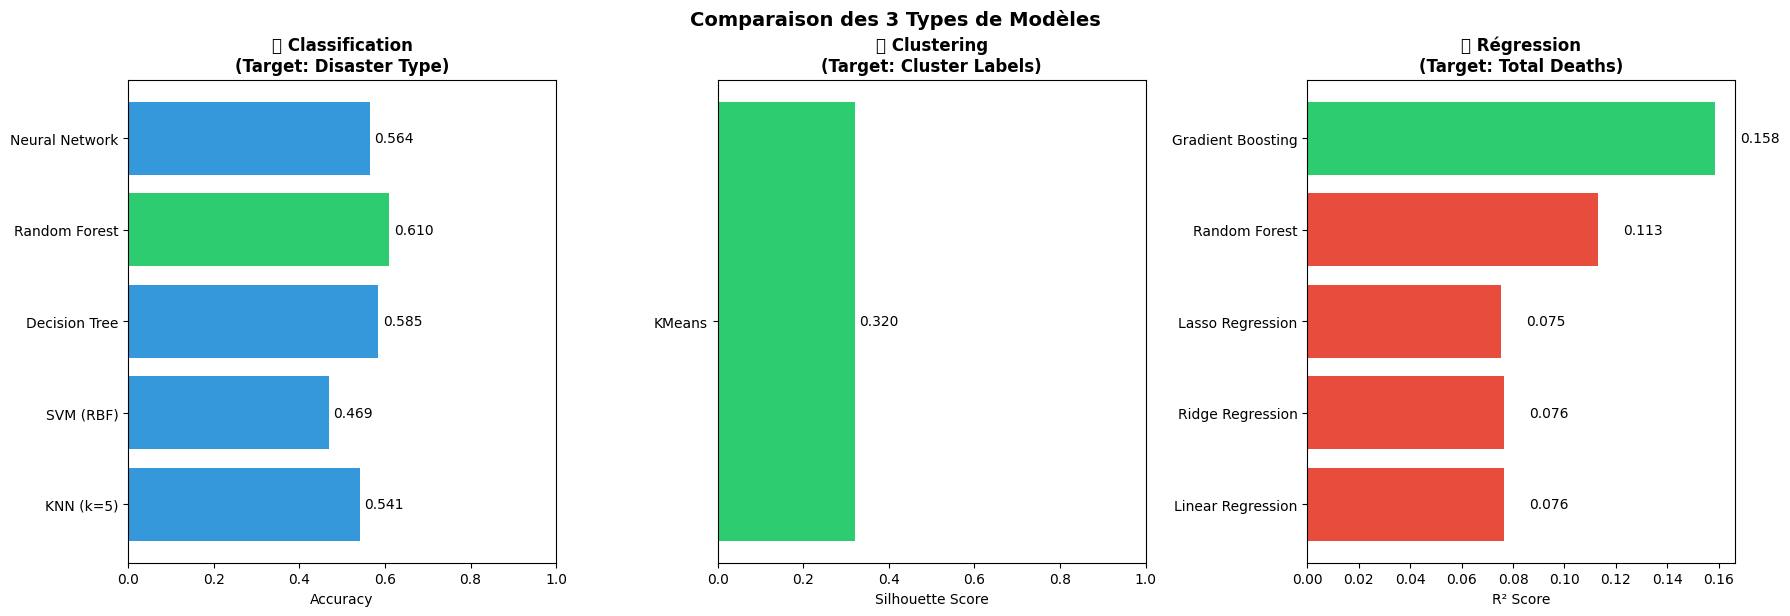

In [30]:
# Create comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Classification - All models comparison
clf_names = list(clf_results.keys())
clf_accuracies = [clf_results[m]['accuracy'] for m in clf_names]
colors_clf = ['#2ecc71' if m == best_clf_name else '#3498db' for m in clf_names]
axes[0].barh(clf_names, clf_accuracies, color=colors_clf)
axes[0].set_xlabel('Accuracy')
axes[0].set_title('📊 Classification\n(Target: Disaster Type)', fontsize=12, fontweight='bold')
axes[0].set_xlim(0, 1)
for i, v in enumerate(clf_accuracies):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

# 2. Clustering - Summary
clust_methods = list(clust_results.keys()) if clust_results else ['KMeans', 'SpectralClustering', 'DBSCAN']
clust_scores = [clust_results.get(m, {}).get('silhouette', 0) or 0 for m in clust_methods]
colors_clust = ['#2ecc71' if s == max(clust_scores) else '#9b59b6' for s in clust_scores]
axes[1].barh(clust_methods, clust_scores, color=colors_clust)
axes[1].set_xlabel('Silhouette Score')
axes[1].set_title('🎯 Clustering\n(Target: Cluster Labels)', fontsize=12, fontweight='bold')
axes[1].set_xlim(0, 1)
for i, v in enumerate(clust_scores):
    axes[1].text(max(v + 0.01, 0.01), i, f'{v:.3f}', va='center', fontsize=10)

# 3. Regression - All models comparison
reg_names = list(reg_results.keys())
reg_r2s = [reg_results[m]['r2'] for m in reg_names]
colors_reg = ['#2ecc71' if m == best_reg_name else '#e74c3c' for m in reg_names]
axes[2].barh(reg_names, reg_r2s, color=colors_reg)
axes[2].set_xlabel('R² Score')
axes[2].set_title('📈 Régression\n(Target: Total Deaths)', fontsize=12, fontweight='bold')
for i, v in enumerate(reg_r2s):
    axes[2].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.suptitle('Comparaison des 3 Types de Modèles', fontsize=14, fontweight='bold', y=1.02)
plt.show()

### 🎯 Conclusions et Recommandations

In [31]:
print("\n" + "="*80)
print("🎯 CONCLUSIONS ET RECOMMANDATIONS")
print("="*80)

print(f"""
┌─────────────────────────────────────────────────────────────────────────────────┐
│                              RÉSUMÉ DES RÉSULTATS                               │
├─────────────────────────────────────────────────────────────────────────────────┤
│                                                                                 │
│  📊 CLASSIFICATION (Prédiction du Type de Catastrophe)                          │
│     • Meilleur modèle: {best_clf_name:<20}                                   │
│     • Accuracy: {best_clf_score:.4f}                                                          │
│     • Entrées: 8 features (Country, Region, Continent, Season, etc.)            │
│     • Sortie: Disaster Type                                                     │
│                                                                                 │
│  🎯 CLUSTERING (Groupement de Catastrophes Similaires)                          │
│     • Meilleur modèle: {best_clust_name:<20}                                   │
│     • Silhouette: {str(f'{best_clust_score:.4f}' if best_clust_score else 'N/A'):<10}                                                      │
│     • Entrées: 5 features (Latitude, Longitude, Duration, Deaths, Affected)     │
│     • Sortie: Cluster Labels (apprentissage non supervisé)                      │
│                                                                                 │
│  📈 RÉGRESSION (Prédiction du Nombre de Décès)                                  │
│     • Meilleur modèle: {best_reg_name:<20}                                   │
│     • R² Score: {best_reg_score:.4f}                                                          │
│     • Entrées: 8 features (Year, Disaster Type, Country, Region, etc.)          │
│     • Sortie: Total Deaths                                                      │
│                                                                                 │
└─────────────────────────────────────────────────────────────────────────────────┘

📌 NOTES:
   • Les modèles de Classification montrent une performance modérée ({best_clf_score:.1%}), 
     ce qui suggère que la prédiction du type de catastrophe est un problème difficile.
   
   • La Régression pour prédire les décès a un R² faible ({best_reg_score:.4f}), indiquant 
     que d'autres facteurs non inclus influencent fortement le nombre de décès.
   
   • Le Clustering permet d'identifier des patterns géographiques et temporels dans les 
     données de catastrophes.
""")

print("\n✅ Analyse terminée!")


🎯 CONCLUSIONS ET RECOMMANDATIONS

┌─────────────────────────────────────────────────────────────────────────────────┐
│                              RÉSUMÉ DES RÉSULTATS                               │
├─────────────────────────────────────────────────────────────────────────────────┤
│                                                                                 │
│  📊 CLASSIFICATION (Prédiction du Type de Catastrophe)                          │
│     • Meilleur modèle: Random Forest                                          │
│     • Accuracy: 0.6103                                                          │
│     • Entrées: 8 features (Country, Region, Continent, Season, etc.)            │
│     • Sortie: Disaster Type                                                     │
│                                                                                 │
│  🎯 CLUSTERING (Groupement de Catastrophes Similaires)                          │
│     • Meilleur modèle: KMeans              